In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Importing data

df = pd.read_csv('Loan.csv')
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [3]:
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [4]:
df.shape

(20000, 36)

In [5]:
# checking null values

df.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [6]:
df['EmploymentStatus'].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

Text(0.5, 1.0, 'Risk score wrt Marital status')

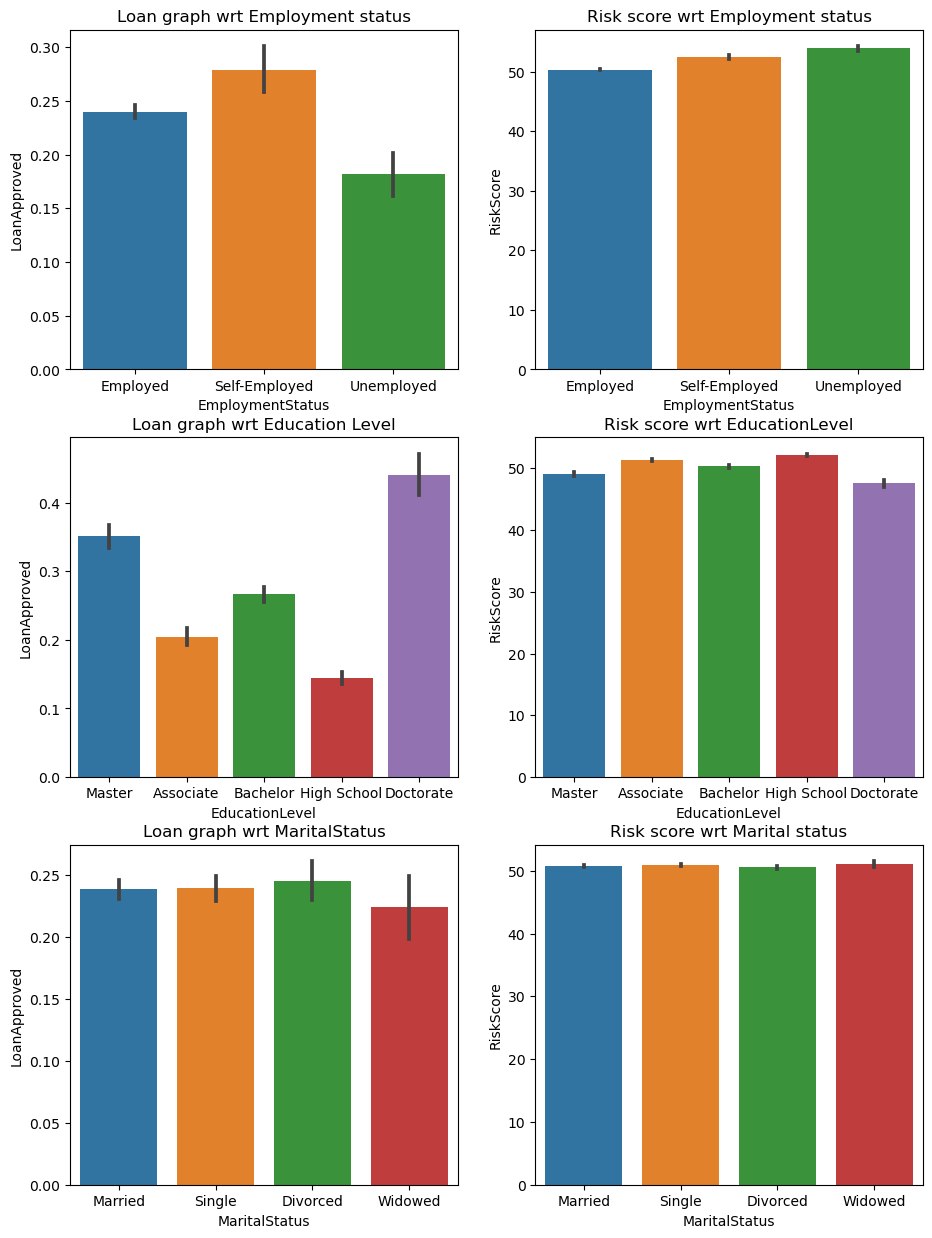

In [14]:
# Plotting graph to see the relation between the followings

plt.figure(figsize=(11,15))

plt.subplot(3,2,1)
sns.barplot(y=df['LoanApproved'],x=df['EmploymentStatus'],data=df)
plt.title("Loan graph wrt Employment status")

plt.subplot(3,2,2)
sns.barplot(y=df['RiskScore'],x=df['EmploymentStatus'],data=df)
plt.title("Risk score wrt Employment status")

plt.subplot(3,2,3)
sns.barplot(y=df['LoanApproved'],x=df['EducationLevel'],data=df)
plt.title("Loan graph wrt Education Level")

plt.subplot(3,2,4)
sns.barplot(y=df['RiskScore'],x=df['EducationLevel'],data=df)
plt.title("Risk score wrt EducationLevel")

plt.subplot(3,2,5)
sns.barplot(y=df['LoanApproved'],x=df['MaritalStatus'],data=df)
plt.title("Loan graph wrt MaritalStatus")

plt.subplot(3,2,6)
sns.barplot(y=df['RiskScore'],x=df['MaritalStatus'],data=df)
plt.title("Risk score wrt Marital status")

Text(0.5, 1.0, 'Loan graph wrt LoanPurpose')

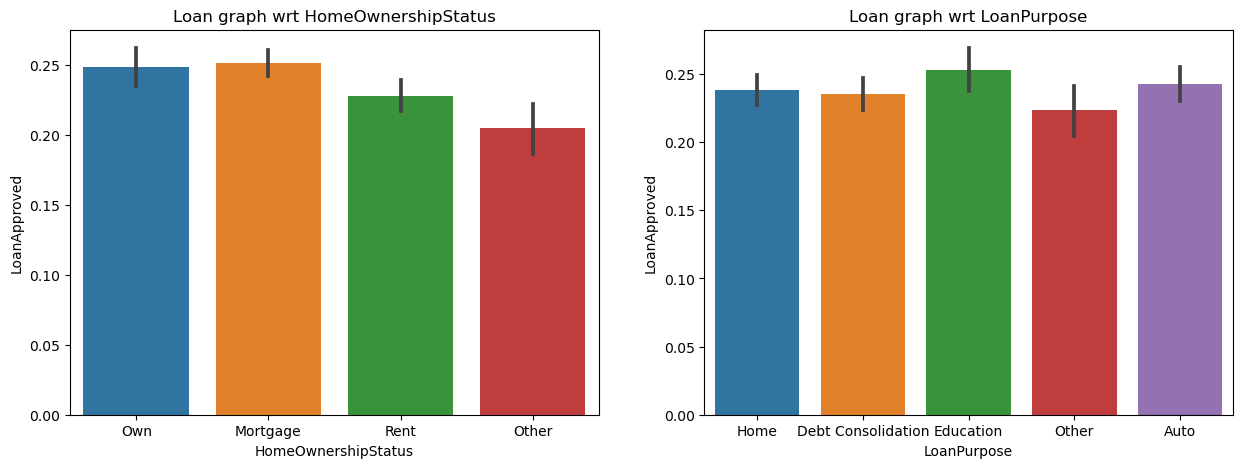

In [121]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y=df['LoanApproved'],x=df['HomeOwnershipStatus'],data=df)
plt.title("Loan graph wrt HomeOwnershipStatus")

plt.subplot(1,2,2)
sns.barplot(y=df['LoanApproved'],x=df['LoanPurpose'],data=df)
plt.title("Loan graph wrt LoanPurpose")

#### Conclusion

1. Unemployed people have slightly more risk score and hence they have the lowest loan approval rate
2. Even though Employed people have less risk score but still loan approval is less than Self Employed people
3. Risk score is slightly less in Doctorate as compared to others and loan approval rate is quite high for the same as well
4. Marital status have no impact on Risk score but loan approval rate is slightly less as compared to other Marital status

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [15]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [54]:
# Extracting 'int' and 'float' features to find out correlation

data=[]
data_str=[]
for feature in df.columns:
    if df[feature].dtype=='int64' or df[feature].dtype=='float64':
        data.append(feature)
    else:
        data_str.append(feature)

In [55]:
df[data].head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,22,13152,48,2,183,0.354418,1,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,15,26045,48,1,496,0.087827,5,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,26,17627,36,2,902,0.137414,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,34,37898,96,1,755,0.267587,2,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,17,9184,36,1,274,0.320535,0,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [56]:
df[data_str].head()

,ApplicationDate,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
0,2018-01-01,Employed,Master,Married,Own,Home
1,2018-01-02,Employed,Associate,Single,Mortgage,Debt Consolidation
2,2018-01-03,Employed,Bachelor,Married,Rent,Education
3,2018-01-04,Employed,High School,Single,Mortgage,Home
4,2018-01-05,Employed,Associate,Married,Mortgage,Debt Consolidation


In [57]:
df[data].corr()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
Age,1.000000,0.144774,0.323243,0.982980,-0.007492,-0.006992,-0.000287,0.015685,-0.001394,-0.001069,...,0.144634,-0.005601,-0.000773,0.014061,-0.238995,-0.202702,-0.021380,-0.111800,0.141029,-0.164304
AnnualIncome,0.144774,1.000000,0.104045,0.145999,-0.004116,0.002972,-0.001244,-0.001082,-0.007935,-0.008175,...,0.989911,-0.012351,-0.000610,-0.004358,-0.074549,-0.063832,-0.004304,-0.532033,0.597900,-0.483289
CreditScore,0.323243,0.104045,1.000000,0.327664,-0.010834,-0.000762,-0.014453,0.011153,-0.009650,-0.008780,...,0.104796,-0.006838,0.008069,0.001951,-0.722619,-0.598844,-0.063932,-0.115363,0.142000,-0.240198
Experience,0.982980,0.145999,0.327664,1.000000,-0.007921,-0.007924,0.000136,0.018629,-0.001751,-0.002143,...,0.145950,-0.006603,-0.000762,0.015049,-0.242871,-0.206252,-0.021691,-0.112825,0.140755,-0.166496
LoanAmount,-0.007492,-0.004116,-0.010834,-0.007921,1.000000,-0.000436,-0.007005,0.021103,0.000806,0.000769,...,-0.005407,-0.012107,0.005364,-0.003679,0.385663,0.322824,0.780828,0.457175,-0.239496,0.137981
LoanDuration,-0.006992,0.002972,-0.000762,-0.007924,-0.000436,1.000000,-0.001301,0.000068,-0.006160,0.001489,...,0.003067,-0.010105,0.003635,-0.008779,0.579215,0.487994,-0.385495,-0.213984,-0.094558,0.054550
NumberOfDependents,-0.000287,-0.001244,-0.014453,0.000136,-0.007005,-0.001301,1.000000,-0.002396,0.011544,0.006033,...,-0.000414,0.008735,0.010910,-0.008423,0.006977,0.006749,-0.001390,-0.000358,0.001717,0.001686
MonthlyDebtPayments,0.015685,-0.001082,0.011153,0.018629,0.021103,0.000068,-0.002396,1.000000,0.005420,0.006280,...,-0.000356,0.001638,0.005863,0.004430,0.000010,0.003895,0.018021,0.219453,-0.070415,0.036938
CreditCardUtilizationRate,-0.001394,-0.007935,-0.009650,-0.001751,0.000806,-0.006160,0.011544,0.005420,1.000000,0.001491,...,-0.009381,0.013040,-0.006979,-0.003506,0.003668,0.001030,0.004366,0.010490,-0.010466,0.108758
NumberOfOpenCreditLines,-0.001069,-0.008175,-0.008780,-0.002143,0.000769,0.001489,0.006033,0.006280,0.001491,1.000000,...,-0.008050,-0.010497,0.007298,-0.002013,0.007457,0.008090,-0.005058,0.003471,-0.004769,0.007762


<Axes: >

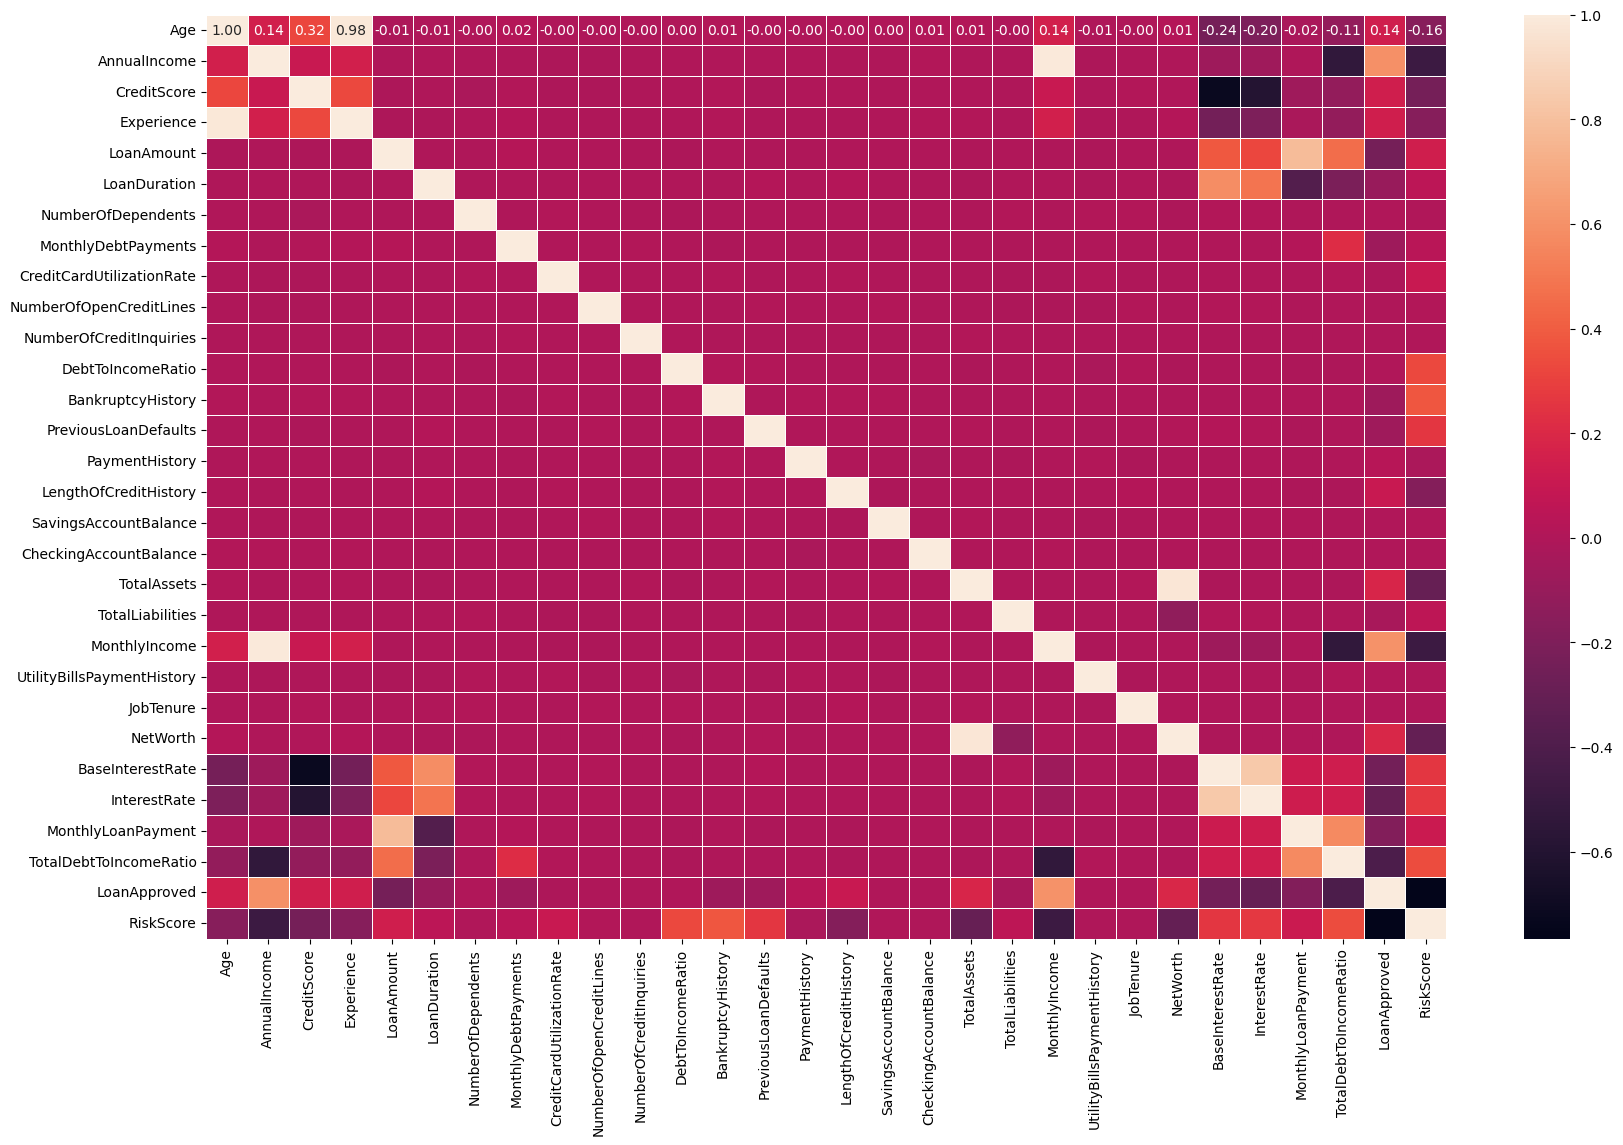

In [102]:
plt.figure(figsize=(20,12))
sns.heatmap(df[data].corr(),annot=True,fmt='.2f',linewidth=.5)

#### Conclusion

1. BaseInterestRate and InterestRate have a very high positive correlation (0.834557), indicating that as the base interest rate increases, the interest rate on loans also increases.
2. LoanAmount and MonthlyLoanPayment have a strong positive correlation (0.780828), meaning that larger loan amounts are associated with higher monthly payments.
3. AnnualIncome and MonthlyIncome are highly correlated (0.989911), which is expected since monthly income is a factor in annual income.
4. LoanApproved and RiskScore have a strong negative correlation (-0.766137). This suggests that as the risk score increases (indicating higher risk), loan approval is less likely.
5. CreditScore and BaseInterestRate have a high negative correlation (-0.722619). This means that people with better credit scores tend to get lower base interest rates on loans.

#### We will remove one of the highly positive correlated features to avoid multicollinearity

In [64]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


<Axes: xlabel='HomeOwnershipStatus', ylabel='count'>

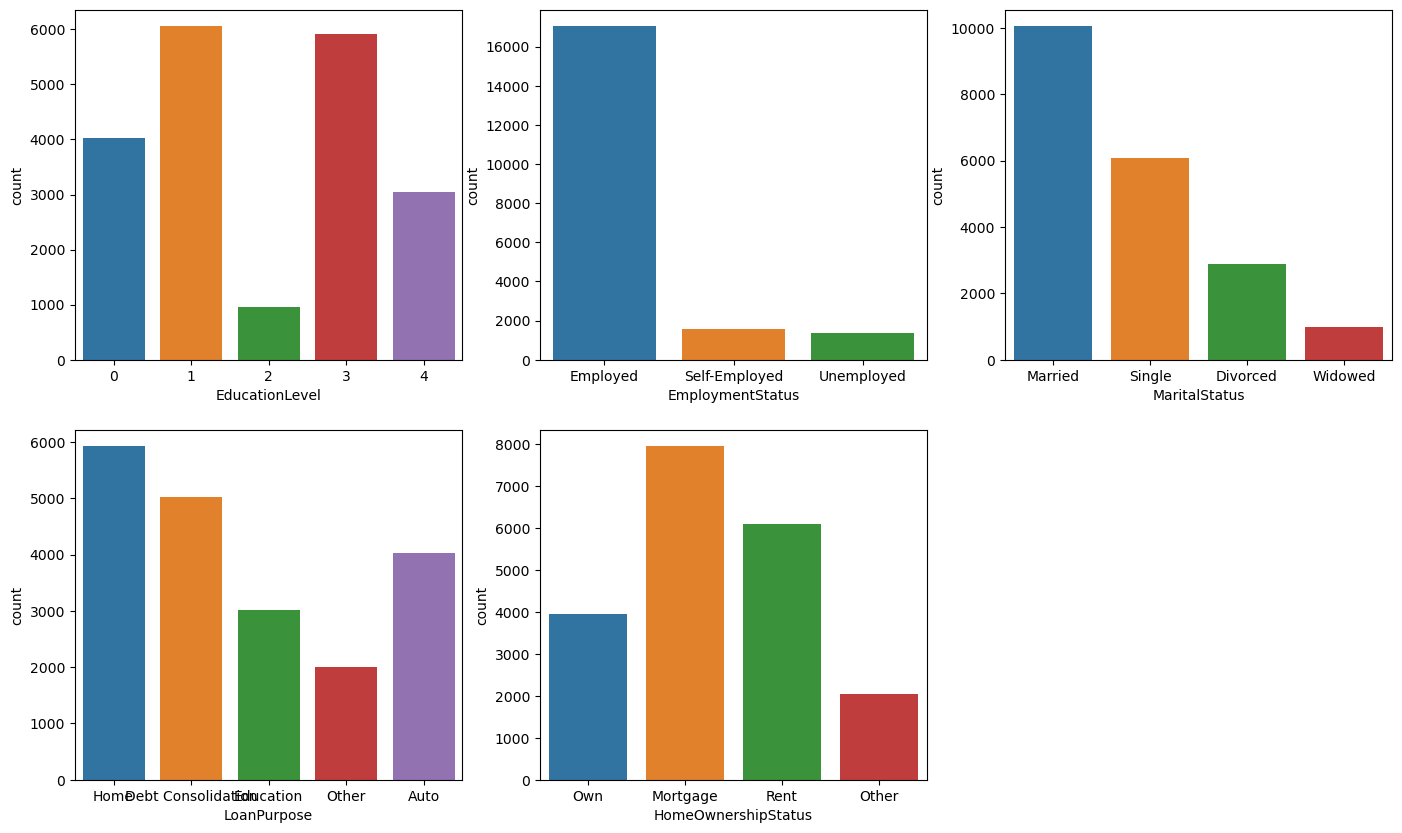

In [113]:
plt.figure(figsize=(17,10))

plt.subplot(2,3,1)
sns.countplot(x=df['EducationLevel'])

plt.subplot(2,3,2)
sns.countplot(x=df['EmploymentStatus'])

plt.subplot(2,3,3)
sns.countplot(x=df['MaritalStatus'])

plt.subplot(2,3,4)
sns.countplot(x=df['LoanPurpose'])

plt.subplot(2,3,5)
sns.countplot(x=df['HomeOwnershipStatus'])

#### Conclusion

1. Count of Doctorate is very less but still we saw that loan approval rate is high
2. Self Employed and Unemployed count is very less as compared to Employed
3. Most of the people applying for loan are married

In [83]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


### Encoding Categorical Features

In [105]:
# LabelEncoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['EducationLevel'] = encoder.fit_transform(df['EducationLevel'])
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,4,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,0,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,1,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,3,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,0,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [122]:
df[data_str].head(10)

,ApplicationDate,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
0,2018-01-01,Employed,4,Married,Own,Home
1,2018-01-02,Employed,0,Single,Mortgage,Debt Consolidation
2,2018-01-03,Employed,1,Married,Rent,Education
3,2018-01-04,Employed,3,Single,Mortgage,Home
4,2018-01-05,Employed,0,Married,Mortgage,Debt Consolidation
5,2018-01-06,Self-Employed,4,Married,Rent,Debt Consolidation
6,2018-01-07,Employed,3,Married,Rent,Other
7,2018-01-08,Employed,3,Divorced,Mortgage,Other
8,2018-01-09,Employed,1,Divorced,Own,Debt Consolidation
9,2018-01-10,Employed,0,Married,Other,Other


In [123]:
# One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

In [125]:
# Columns to apply One-Hot Encoding
one_hot_cols = ['EmploymentStatus', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']

ohe = OneHotEncoder(sparse=False, drop='first')  # drop='first' avoids multicollinearity by dropping the first category
encoded_data = ohe.fit_transform(df[one_hot_cols])

# Convert the encoded data to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(one_hot_cols))

# Drop the original columns from the DataFrame
df = df.drop(one_hot_cols, axis=1)

# Concatenate the original DataFrame with the new one-hot encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

df.head()

C:\Users\a\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ApplicationDate,Age,AnnualIncome,CreditScore,EducationLevel,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,2018-01-01,45,39948,617,4,22,13152,48,2,183,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2018-01-02,38,39709,628,0,15,26045,48,1,496,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2018-01-03,47,40724,570,1,26,17627,36,2,902,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2018-01-04,58,69084,545,3,34,37898,96,1,755,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2018-01-05,37,103264,594,0,17,9184,36,1,274,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ApplicationDate                 20000 non-null  object 
 1   Age                             20000 non-null  int64  
 2   AnnualIncome                    20000 non-null  int64  
 3   CreditScore                     20000 non-null  int64  
 4   EducationLevel                  20000 non-null  int32  
 5   Experience                      20000 non-null  int64  
 6   LoanAmount                      20000 non-null  int64  
 7   LoanDuration                    20000 non-null  int64  
 8   NumberOfDependents              20000 non-null  int64  
 9   MonthlyDebtPayments             20000 non-null  int64  
 10  CreditCardUtilizationRate       20000 non-null  float64
 11  NumberOfOpenCreditLines         20000 non-null  int64  
 12  NumberOfCreditInquiries         

### Feature Selection

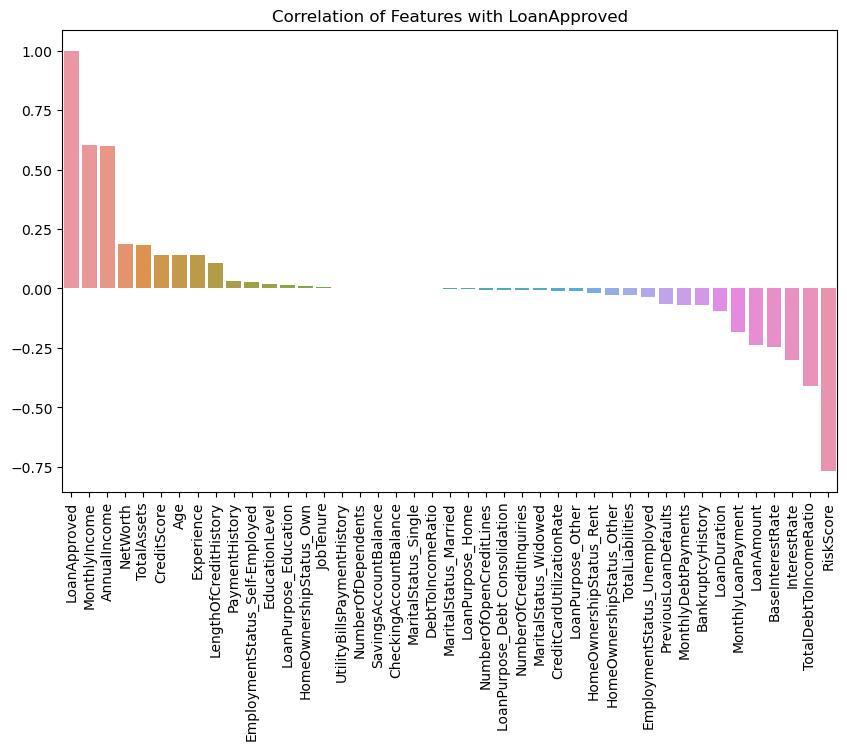

In [128]:
# Correlation w.r.t. output feature

correlation = df.drop(columns=['ApplicationDate']).corr()['LoanApproved'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with LoanApproved')
plt.show()

In [129]:
print(correlation)

LoanApproved                      1.000000
MonthlyIncome                     0.604101
AnnualIncome                      0.597900
NetWorth                          0.187892
TotalAssets                       0.184011
CreditScore                       0.142000
Age                               0.141029
Experience                        0.140755
LengthOfCreditHistory             0.105949
PaymentHistory                    0.030804
EmploymentStatus_Self-Employed    0.027026
EducationLevel                    0.019650
LoanPurpose_Education             0.013804
HomeOwnershipStatus_Own           0.011445
JobTenure                         0.004997
UtilityBillsPaymentHistory        0.003303
NumberOfDependents                0.001717
SavingsAccountBalance             0.000961
CheckingAccountBalance            0.000660
MaritalStatus_Single              0.000601
DebtToIncomeRatio                 0.000034
MaritalStatus_Married            -0.001125
LoanPurpose_Home                 -0.001560
NumberOfOpe

In [131]:
# Drop features to avoid multicollinearity
# Drop features which have negligible correlation with output feature

drop_features = ['BaseInterestRate','MonthlyIncome','ApplicationDate','SavingsAccountBalance', 'CheckingAccountBalance',
                 'MaritalStatus_Married', 'DebtToIncomeRatio','MaritalStatus_Single','JobTenure','LoanPurpose_Home',
                 'UtilityBillsPaymentHistory']

df.drop(columns=drop_features,inplace=True)

#### Model Train

In [132]:
# Independent and Dependent features

X = df.drop(columns=['LoanApproved'])
y = df['LoanApproved']

In [133]:
# Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15000, 32)
(5000, 32)
(15000,)
(5000,)


#### Random Forest and GridSearchCV

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [136]:
# Fit model without hyperparameter tuning to check initial accuracy

classifier = RandomForestClassifier()

In [137]:
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [138]:
y_pred = classifier.predict(X_test)

#### Accuracy

In [142]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [143]:
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3755
           1       0.98      0.98      0.98      1245

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000

0.9904
[[3726   29]
 [  19 1226]]
